<h1 style="text-align:center;">Churn Prediction</h1>

<h3> Before we begin, let me intoduce you to business problem.</h3>
A bank manager was disappointed as time to time many people have shut down their credit card services from that bank. and the bank manager wants to find out who is gonna leave the bank in future so he can give better offers to those customer to stick with them. so the bank manager collected the data for credit card services and wants to find answers.



<h2>So, How we gonna help the bank manager?</h2>

we will solve our problem in following steps(or how a data science project look like)

* collecting data
* data wrangling
* a deep dive analysis on data
* feature engineering part
* Data preprocessing
* building models
* hyperparameter tuning
* analyis on model


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customers/BankChurners.csv


### Importing some useful libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
#reading data from kaggle input
df=pd.read_csv('/kaggle/input/credit-card-customers/BankChurners.csv')
print('Toatal No oF rows',df.shape[0])
print('Toatal No oF columns',df.shape[1])
df.info()

Toatal No oF rows 10127
Toatal No oF columns 23
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                           

As already mentioned in the problem statement that the last two columns are not useful at all. so we gonna drop it before proceeding to next step

In [4]:
df.drop([df.columns[21],df.columns[22]],axis=1,inplace=True)
df.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


Allright so we have deleted the last two columns and now we are done with data collecting process. now we will gain insight about data.

<h1 style="text-align:center;">Deep dive into data</h1>

In [5]:
# lets describe the data.... the script written below will give info about many thing..lets check
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


**Note:** the above code only works on numerical data
<br>
As of now you can see that it gives the idea about mean ,max,count of the object.
before moving further lets check about the missing values in data.

In [6]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

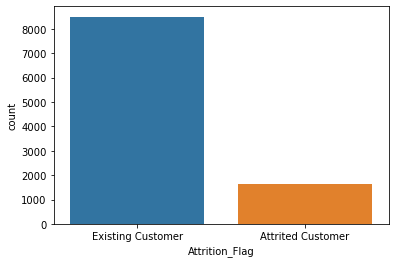

In [7]:
sns.countplot(df['Attrition_Flag'])

IT is highly imbalanced dataset...as our target column is having 85-15 ration which needs a fine technuique to train our model.

AS we can see there are no missing values in data.. which is good for us.


<h1 style="text-align:center;">Exploratort data analysis</h1>

here we are splitting categorical data and numerical data..so that it will be easy for us to do anlysis.

In [8]:
df_obj=df.select_dtypes(include=[object])
df_numr=df.select_dtypes(exclude=[object])

In [9]:
df_obj

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...,...
10122,Existing Customer,M,Graduate,Single,$40K - $60K,Blue
10123,Attrited Customer,M,Unknown,Divorced,$40K - $60K,Blue
10124,Attrited Customer,F,High School,Married,Less than $40K,Blue
10125,Attrited Customer,M,Graduate,Unknown,$40K - $60K,Blue


1. lets do UNIVARIATE analysis on categorical variable

In [10]:
for i in df_obj.columns:
    print(df_obj[i].value_counts())
    




Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
F    5358
M    4769
Name: Gender, dtype: int64
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


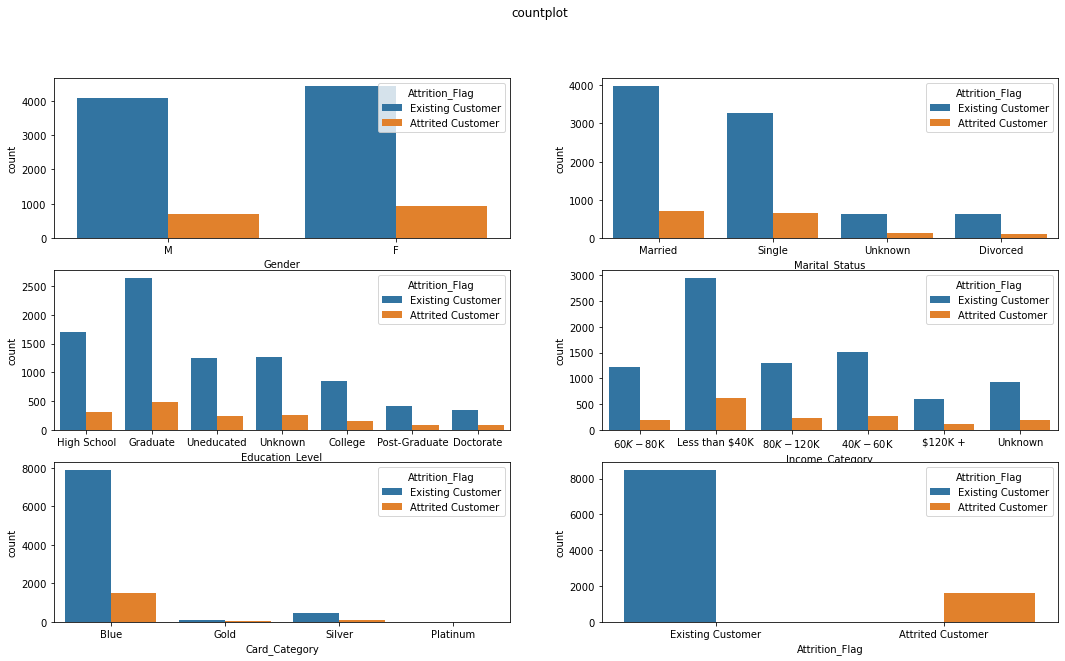

In [11]:
# lets analyse it with the help of graph
fig, axes = plt.subplots(3, 2, figsize=(18, 10))

fig.suptitle('countplot')

sns.countplot(ax=axes[0, 0],x=df_obj['Gender'],hue=df_obj['Attrition_Flag'])
sns.countplot(ax=axes[0, 1], x=df_obj['Marital_Status'],hue=df_obj['Attrition_Flag'])
sns.countplot(ax=axes[1, 0], x=df_obj['Education_Level'],hue=df_obj['Attrition_Flag'])
sns.countplot(ax=axes[1, 1], x=df_obj['Income_Category'],hue=df_obj['Attrition_Flag'])
sns.countplot(ax=axes[2, 0], x=df_obj['Card_Category'],hue=df_obj['Attrition_Flag'])
sns.countplot(ax=axes[2, 1], x=df_obj['Attrition_Flag'],hue=df_obj['Attrition_Flag'])




from the above graph we can conclude the following points:
* females own more credit card than male
* Married people takes the more credit card
* mostly people are graduate 
* most people have salary less than 40k 
* almost 90% people have Blue Card

And last point is what we have to predict who will gonna leave services in Future.

In [12]:

# dropping CLIENTNUM which is unique id so its not useful at all
df_numr.drop('CLIENTNUM',axis=1,inplace=True)
# now we gonna analyse numerical feature
df_numr.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


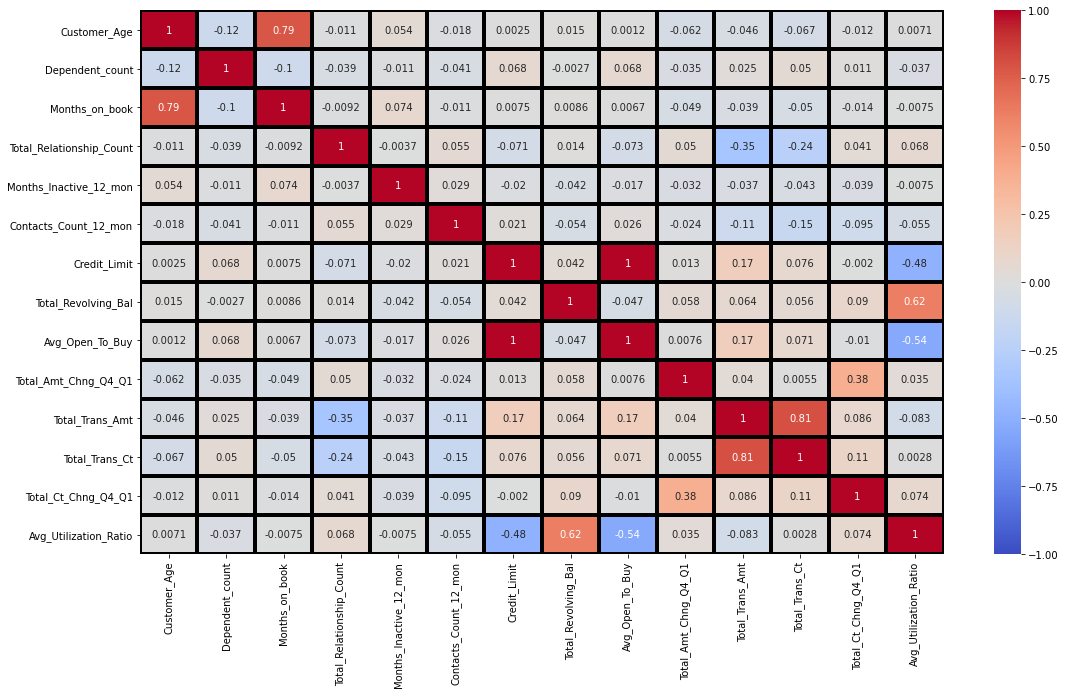

In [13]:
# now we will chevck if features are correlated
df_numr.corr()

# pretty difficult to understand..not a problem we create visualization for it
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(18,10)

sns.heatmap(df_numr.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black',ax=ax)

# WHY correlation matrix
as we can see from above graph that many feature are highly correletaed to each other which means that increasing a also increase b... they have almost several feature. so it is important for us to drop highly correlated feature
which we gonna perform in feature selection process.

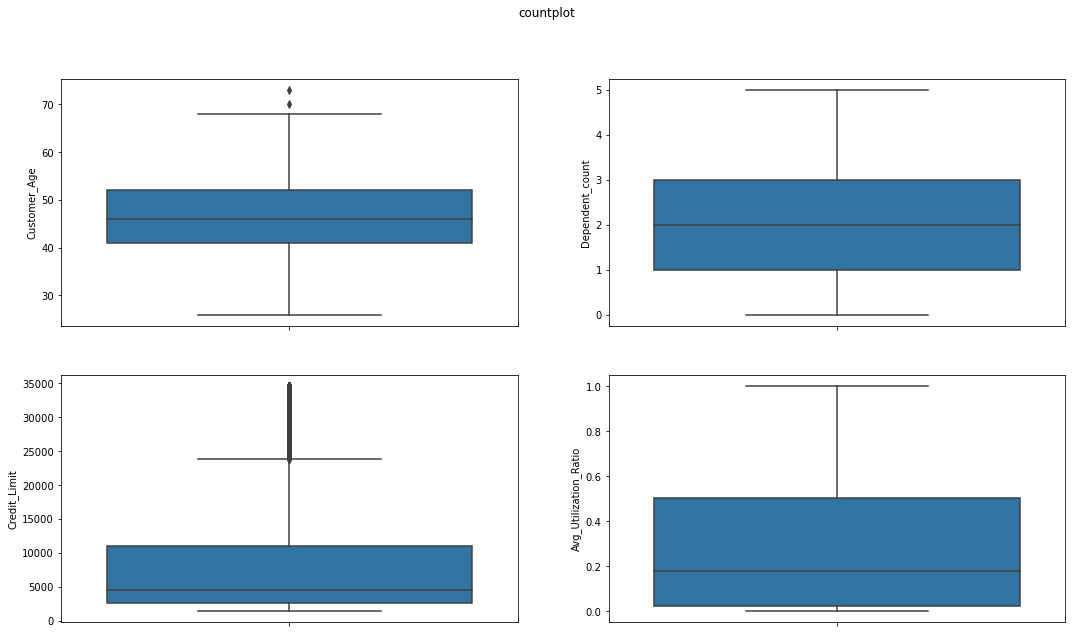

In [14]:
#lets analyse some important numerical feature
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('countplot')

sns.boxplot(ax=axes[0][0],y=df_numr['Customer_Age'])
sns.boxplot(ax=axes[0][1],y=df_numr['Dependent_count'])
sns.boxplot(ax=axes[1][0],y=df_numr['Credit_Limit'])
sns.boxplot(ax=axes[1][1],y=df_numr['Avg_Utilization_Ratio'])

**AS we can see from above that the data contains outliers in some feature... lets see hoe to solve this problem**

### So we are done with DAta Analysis phase.now we are ready to move further.

<h1 style="text-align:center;">Feature Engineering And Data Preprocessing</h1>

In [15]:
# as we already know that some of the features in our dataset are highly correleated...so it is better practice
# for us to drop those feature
correlated_features = set()
correlation_matrix = df_numr.corr()
# we gonna drop feature which have pearson coffecirnts greater than 0.6
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.6:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
df_numr.drop(labels=correlated_features, axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
# one hot encoding of object category data
obj_data=pd.get_dummies(df_obj.drop(columns=['Attrition_Flag']),drop_first=True)
obj_data

,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
10123,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
10124,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
10125,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0


Allright pretty good we have reduced our feature.... to avoid the complex model...still it contains lots of feature.

In [17]:
# joining our numr dataframe and object dataframe
main_df=pd.concat([obj_data,df_numr],axis=1)
main_df.head()

,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,...,Customer_Age,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1
0,1,0,0,1,0,0,0,1,0,0,...,45,3,5,1,3,12691.0,777,1.335,1144,1.625
1,0,0,1,0,0,0,0,0,1,0,...,49,5,6,1,2,8256.0,864,1.541,1291,3.714
2,1,0,1,0,0,0,0,1,0,0,...,51,3,4,1,0,3418.0,0,2.594,1887,2.333
3,0,0,0,1,0,0,0,0,0,1,...,40,4,3,4,1,3313.0,2517,1.405,1171,2.333
4,1,0,0,0,0,1,0,1,0,0,...,40,3,5,1,0,4716.0,0,2.175,816,2.500


In [18]:
# splitting dependent and independent feature 
Y=pd.get_dummies(df_obj['Attrition_Flag'],drop_first=True)
X=main_df

In [19]:
print(X.shape)
print(Y.shape)

(10127, 28)
(10127, 1)


In [20]:
# before moving any further we have to deal with imbalanced dataset
# there are two tecnique to do handle imbalanced dataset..oversampling and undersampling
# if the data is too large we can perform down sampling... butr as our data is not so big we perform oversampling
smk=SMOTETomek(random_state=42)
xres,yres=smk.fit_sample(X,Y)

In [21]:
print(xres.shape,yres.shape)

(16448, 28) (16448, 1)


Allright, as you can see now that your dataset is balanced..we are ready to move further. **HAPPY!**

In [22]:
# dividing dataset into training and testing set 
X_train, X_test, y_train, y_test = train_test_split(xres, yres, test_size=0.25, random_state=42)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(12336, 28) (12336, 1) (4112, 28) (4112, 1)


<h1 style="text-align:center;">MODEL BUILDING</h1>

model building is the easiest process in data science...there are lots of classification algorithm to go with...there is no certainity that this mdel or that model will perform model..
we have to try different model and see which perfortms better.
wer will go with RANDOM FOREST CLASSIFIER

In [23]:
#we have trained our model with some random parameter and lets see the accuracy
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=50)
classifier.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=50)

In [24]:
# calculating accuracy score and confusion matrix
prediction=classifier.predict(X_test)
print(accuracy_score(y_test,prediction))
print(confusion_matrix(y_test,prediction))

0.9644941634241245
[[1978   55]
 [  91 1988]]


**as you can see we got a pretty decent score of 96% accuracy**
Lets tune hyperparameter to check if we increase our accuracy

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
#param_grid = { 
#  'n_estimators': [10,50,200, 500],
#    'max_features': ['auto', 'sqrt', 'log2'],
#    'max_depth' : [4,5,6,7,8],
#   'criterion' :['gini', 'entropy']

#}
#rfc=RandomForestClassifier(random_state=42)
#CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
#CV_rfc.fit(X_train, y_train)

In [27]:
#CV_rfc.best_params_

In [28]:
# these parameters are obtained by hyperparameter tuning
classifierfinal=RandomForestClassifier(n_estimators=500,criterion='gini',random_state=50,max_depth=8,max_features='auto')
classifierfinal.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(max_depth=8, n_estimators=500, random_state=50)

In [29]:

prediction1=classifierfinal.predict(X_test)
print(accuracy_score(y_test,prediction1))
print(confusion_matrix(y_test,prediction1))

0.9523346303501945
[[1915  118]
 [  78 2001]]


wait a min**after tuning the model even we get less accuracy...sometimes it happens because initially our model have been overfitted the data...now this model is good to used **
<h3> also it depands on the domain expertise what kind of metrics they require</h3>

<h1> so finally we are done with how a datascience project look like in an industry.. if You find this notebook useful..please upvote it and leave a comment.</h1>